# Data Cleaning Project: Star Wars survey information- Nadir Nibras
### The goal of this project is gaining insights on Star Wars from a survey of 835 Star Wars fans

In [99]:
#  specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

### Exploring the data-set

In [100]:
star_wars.head(10)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Removing rows where the respondent ID is null

In [101]:
star_wars= star_wars[star_wars["RespondentID"].notnull()]
star_wars.shape

(1186, 38)

### Converting certain columns to boolean columns

In [102]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)



Checking if conversion worked

In [103]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [104]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Doing the same with more columns

In [106]:
movie_yn={
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    True: True,
    False: False,
    np.nan: False
}
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movie_yn)


In [107]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6",
})
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


### Analyzing movie rankings
Converting ratings columns to numeric columns, and renaming  columns

In [115]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6",
})
star_wars[star_wars.columns[9:15]].head()


,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


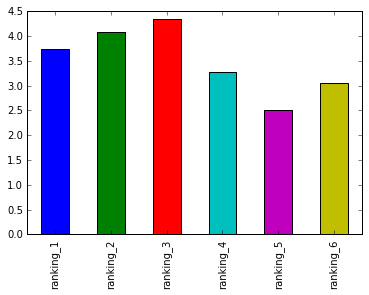

In [116]:
mean_columns= star_wars[star_wars.columns[9:15]].mean()
mean_columns.plot.bar()

Based on the mean rankings, "Star Wars: Episode V The Empire Strikes Back" seems to be the best ranked, and "Star Wars: Episode III Revenge of the Sith" seems to be the worst ranked.

### Investigating which movies are watched the most

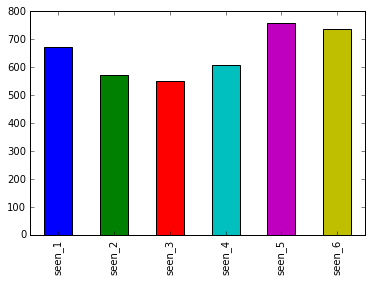

In [117]:
sum_watched =star_wars[star_wars.columns[3:9]].sum()
sum_watched.plot.bar()

"Star Wars: Episode V The Empire Strikes Back"  seems to be the most watched one and "Star Wars: Episode III Revenge of the Sith"  seems to be the least watched one. There seems to be a correlation between number of peopel who watch a Star Wars move and how it's rated/ranked

### Analyzing gender differences in movie rankings

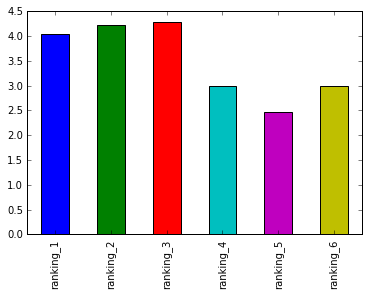

In [120]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

male_mean_columns= males[star_wars.columns[9:15]].mean()
male_mean_columns.plot.bar()

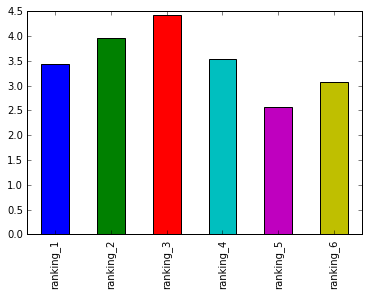

In [121]:
female_mean_columns= females[star_wars.columns[9:15]].mean()
female_mean_columns.plot.bar()

The patterns on rankings do not seem to change much by gender
### Analyzing rankings by fandom

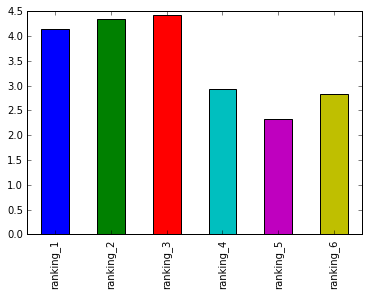

In [122]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
nofans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

fans_mean_columns= fans[star_wars.columns[9:15]].mean()
fans_mean_columns.plot.bar()

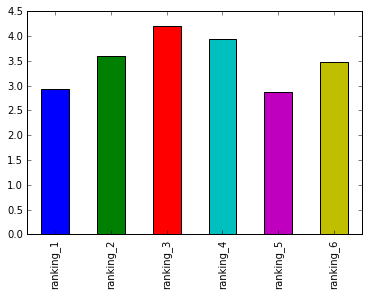

In [123]:
nofans_mean_columns= nofans[star_wars.columns[9:15]].mean()
nofans_mean_columns.plot.bar()